In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

life_exp = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
planes = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
planes.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
# Add 'h' to the duration column values
planes['duration'] = planes['duration'].astype(str) + 'h'



In [8]:
# Verify the change
print(planes.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class duration  days_left  price  
0          Night           Mumbai  Economy    2.17h          1   5953  
1        Morning           Mumbai  Economy    2.33h          1   5953  
2  Early_Morning           Mumbai  Economy    2.17h          1   5956  
3      Afternoon           Mumbai  Economy    2.25h          1   5955  
4        Morning           Mumbai  Economy    2.33h          1   5955  


# * Flight duration calculating mean, median , std statistics

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis. seaborn has been imported as sns.


* Print the first five values of the "Duration" column.
* Remove "h" from the column.
* Convert the column to float data type.
* Plot a histogram of "Duration" values.

In [11]:
print(planes["duration"].head())

# Remove the string character
planes["duration"] = planes["duration"].str.replace("h","")

# Convert to float data type
planes["duration"] = planes["duration"].astype(float)

0    2.17h
1    2.33h
2    2.17h
3    2.25h
4    2.33h
Name: duration, dtype: object


0    2.17
1    2.33
2    2.17
3    2.25
4    2.33
Name: duration, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


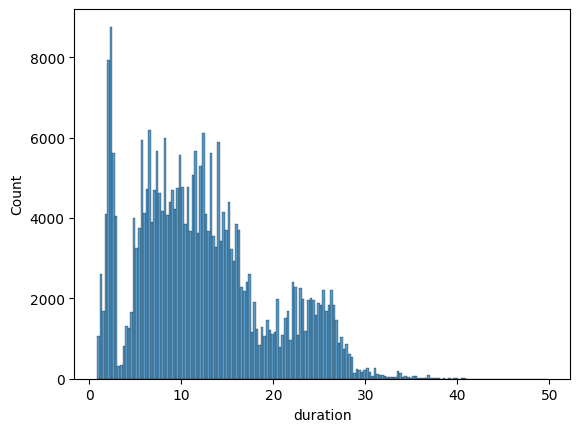

In [13]:
print(planes["duration"].head())

# Plot a histogram
sns.histplot(x="duration", data=planes)
plt.show()

**Creative cleaning skills! Once the data was in the right format, you were able to plot the distribution of 'Duration' and see that the most common flight length is around three hours.**

# **Adding descriptive statistics**

Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

* Add a column to planes containing the standard deviation of "Price" based on "Airline".
* Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration".
* Find the mean "Price" by "Destination", saving it as a column called "price_destination_mean".

In [14]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("airline")["price"].transform(lambda x: x.std())

print(planes[["airline", "airline_price_st_dev"]].value_counts())

airline    airline_price_st_dev
Vistara    25637.159445            127859
Air_India  20905.116909             80892
Indigo     3268.894831              43120
GO_FIRST   2513.865560              23173
AirAsia    2824.055172              16098
SpiceJet   2999.630406               9011
Name: count, dtype: int64


In [16]:
# Median by Airline
planes["airline_median_duration"] = planes.groupby("airline")["duration"].transform(lambda x: x.median())

print(planes[["airline", "airline_median_duration"]].value_counts())

airline    airline_median_duration
Vistara    12.50                      127859
Air_India  15.00                       80892
Indigo     6.00                        43120
GO_FIRST   8.83                        23173
AirAsia    9.33                        16098
SpiceJet   12.00                        9011
Name: count, dtype: int64


* First value = median flight duration for the airline (in hours).
* Second value = number of flights with this median duration for that airline.

The first numeric value (under airline_median_duration) represents the median duration of flights for that specific airline. For example, the median duration for Vistara flights is 12.50 hours, and for Air_India flights, it's 15.00 hours.

The second numeric value (after the median duration) represents the count of flights (i.e., how many flights have this particular median duration for the airline). For example, 127,859 flights have a median duration of 12.50 hours for Vistara, and 80,892 flights have a median duration of 15.00 hours for Air_India.

In [18]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("destination_city")["price"].transform(lambda X: X.mean())

print(planes[["destination_city","price_destination_mean"]].value_counts())

destination_city  price_destination_mean
Mumbai            21372.529469              59097
Delhi             18436.767870              57360
Bangalore         21593.955784              51068
Kolkata           21959.557556              49534
Hyderabad         20427.661284              42726
Chennai           21953.323969              40368
Name: count, dtype: int64


The first numeric value (under price_destination_mean) represents the mean (average) price of flights to that specific destination_city. For example, the mean price of flights to Mumbai is 21,372.53, and to Delhi, it is 18,436.77.

The second numeric value (after the mean price) represents the count of flights to that particular destination city. For example, there are 59,097 flights with a mean price of 21,372.53 to Mumbai, and 57,360 flights with a mean price of 18,436.77 to Delhi.

Summary:
* First value = mean (average) price of flights to the destination city.
* Second value = number of flights for that destination with this mean price.

Terrific transforming! Looks like Vistara has the largest standard deviation in price, Air_India has the largest median duration, and Chennai, on average, is the most expensive destination. Now let's look at how to handle outliers.

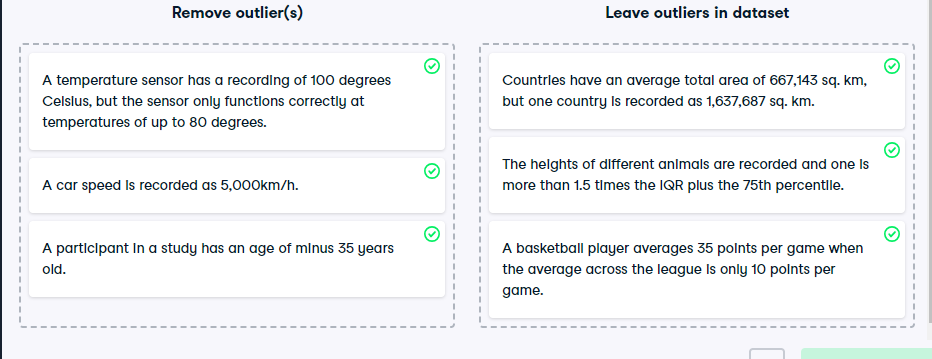

# Identifying outliers

You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.


* Plot the distribution of "Price" column from planes.
* Display the descriptive statistics for flight duration.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


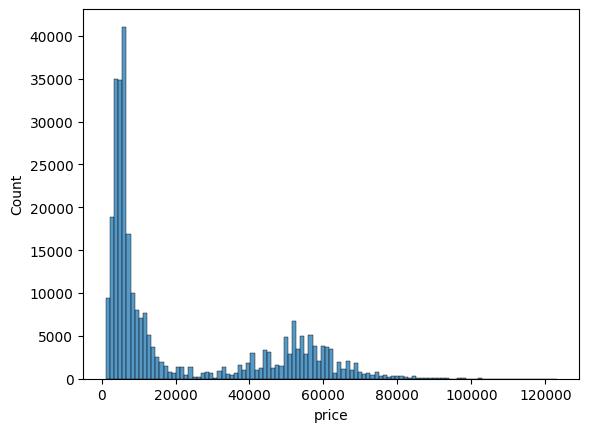

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64


In [20]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="price")
plt.show()

# Display descriptive statistics for flight duration
print(planes["duration"].describe())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


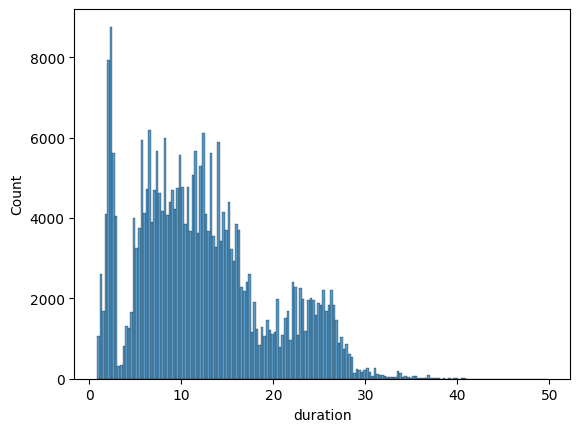

In [21]:
sns.histplot(data=planes, x="duration")
plt.show()

**Both "Price" and "Duration" contains outliers as they are skewed**

# **Removing outliers**
# 
While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.


* Find the 75th and 25th percentiles, saving as price_seventy_fifth and price_twenty_fifth respectively.
* Calculate the IQR, storing it as prices_iqr.
* Calculate the upper and lower outlier thresholds.
* Remove the outliers from planes.



In [22]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["price"].quantile(0.75)
price_twenty_fifth = planes["price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["price"] >lower) & (planes["price"] < upper)]

print(planes["price"].describe())

count    300030.000000
mean      20855.326674
std       22638.775853
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max       98972.000000
Name: price, dtype: float64


**Ridiculous outlier removal skills! You managed to create thresholds based on the IQR and used them to filter the planes dataset to eliminate extreme prices. Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!**